In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [3]:
start = "2012-01-01"
end="2022-10-31"
stock='GOOG'

data = yf.download(stock,start,end)

[*********************100%%**********************]  1 of 1 completed


In [5]:
data.reset_index(inplace=True)

In [8]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,16.262545,16.641375,16.248346,16.573130,16.573130,147611217
1,2012-01-04,16.563665,16.693678,16.453827,16.644611,16.644611,114989399
2,2012-01-05,16.491436,16.537264,16.344486,16.413727,16.413727,131808205
3,2012-01-06,16.417213,16.438385,16.184088,16.189817,16.189817,108119746
4,2012-01-09,16.102144,16.114599,15.472754,15.503389,15.503389,233776981
...,...,...,...,...,...,...,...
2720,2022-10-24,102.089996,103.099998,100.300003,102.970001,102.970001,24680800
2721,2022-10-25,103.300003,105.099998,103.019997,104.930000,104.930000,29910200
2722,2022-10-26,96.760002,98.540001,94.570000,94.820000,94.820000,71504300
2723,2022-10-27,94.309998,95.169998,91.900002,92.599998,92.599998,54036500


In [9]:
ma_100_days=data.Close.rolling(100).mean()

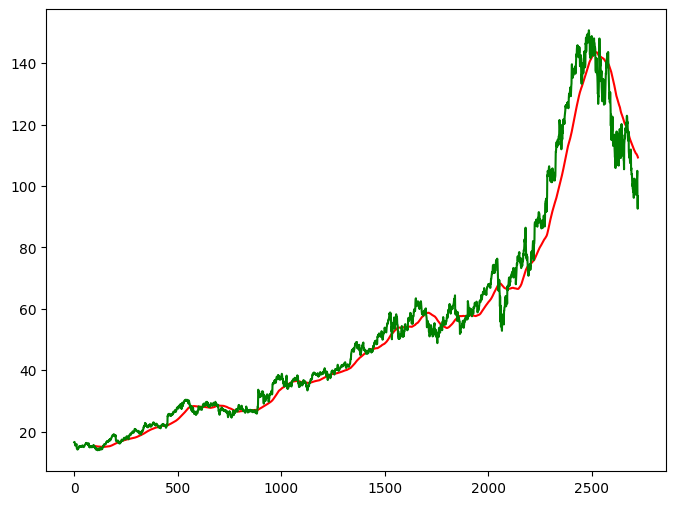

In [10]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days,'r')
plt.plot(data.Close,'g')
plt.show()

In [11]:
ma_200_days= data.Close.rolling(200).mean()

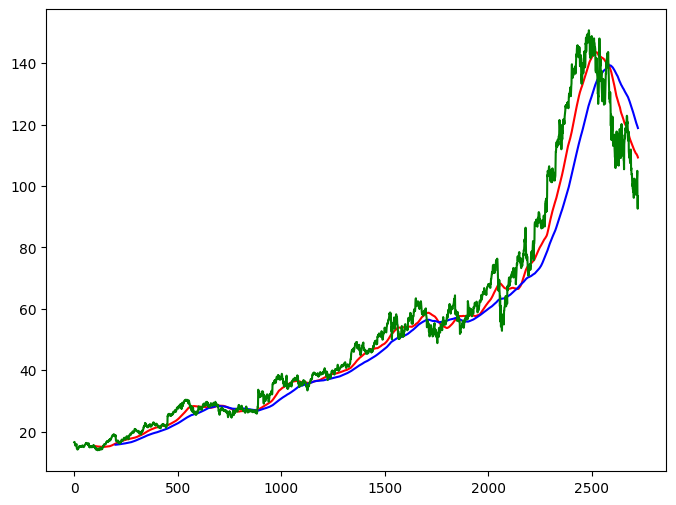

In [12]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days,'r')
plt.plot(ma_200_days,'b')
plt.plot(data.Close,'g')
plt.show()

In [13]:
data.dropna(inplace=True)

In [18]:
data_train = pd.DataFrame(data.Close[0:int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80):len(data)])

In [20]:
data_train.shape[0]

2180

In [21]:
data_test.shape[0]

545

In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))

In [24]:
data_train_scale = scaler.fit_transform(data_train)

In [29]:
x=[]
y=[]
for i in range(100,data_train_scale.shape[0]):
  x.append(data_train_scale[i-100:i])
  y.append(data_train_scale[i,0])


In [32]:
x,y = np.array(x),np.array(y)

In [35]:
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential

In [41]:
model= Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape= ((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu',return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))


In [42]:
model.compile(optimizer ='adam',loss='mean_squared_error')

In [43]:
model.fit(x,y,epochs=50,batch_size=32,verbose=1)

Epoch 1/50
65/65 [==============================] - 23s 270ms/step - loss: 0.0397
Epoch 2/50
65/65 [==============================] - 18s 271ms/step - loss: 0.0091
Epoch 3/50
65/65 [==============================] - 19s 291ms/step - loss: 0.0072
Epoch 4/50
65/65 [==============================] - 21s 315ms/step - loss: 0.0066
Epoch 5/50
65/65 [==============================] - 18s 271ms/step - loss: 0.0069
Epoch 6/50
65/65 [==============================] - 18s 270ms/step - loss: 0.0052
Epoch 7/50
65/65 [==============================] - 18s 277ms/step - loss: 0.0053
Epoch 8/50
65/65 [==============================] - 19s 297ms/step - loss: 0.0056
Epoch 9/50
65/65 [==============================] - 18s 270ms/step - loss: 0.0059
Epoch 10/50
65/65 [==============================] - 20s 303ms/step - loss: 0.0052
Epoch 11/50
65/65 [==============================] - 18s 275ms/step - loss: 0.0052
Epoch 12/50
65/65 [==============================] - 19s 294ms/step - loss: 0.0047
Epoch 13/50
6

In [44]:
model.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout_4 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_5 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_5 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_6 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_6 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_7 (LSTM)               (None, 120)              

In [45]:
pas_100_days= data_train.tail(100)

In [48]:
data_test=pd.concat([pas_100_days,data_test],ignore_index=True)

In [49]:
data_test_scale= scaler.fit_transform(data_test)

In [50]:
x=[]
y=[]
for i in range(100,data_train_scale.shape[0]):
  x.append(data_train_scale[i-100:i])
  y.append(data_train_scale[i,0])

In [51]:
x,y= np.array(x),np.array(y)

In [52]:
y_predict= model.predict(x)

65/65 [==============================] - 10s 136ms/step


In [60]:
scale = 1/scaler.scale_

In [61]:
y_predict= y_predict*scale

In [62]:
y =y*scale

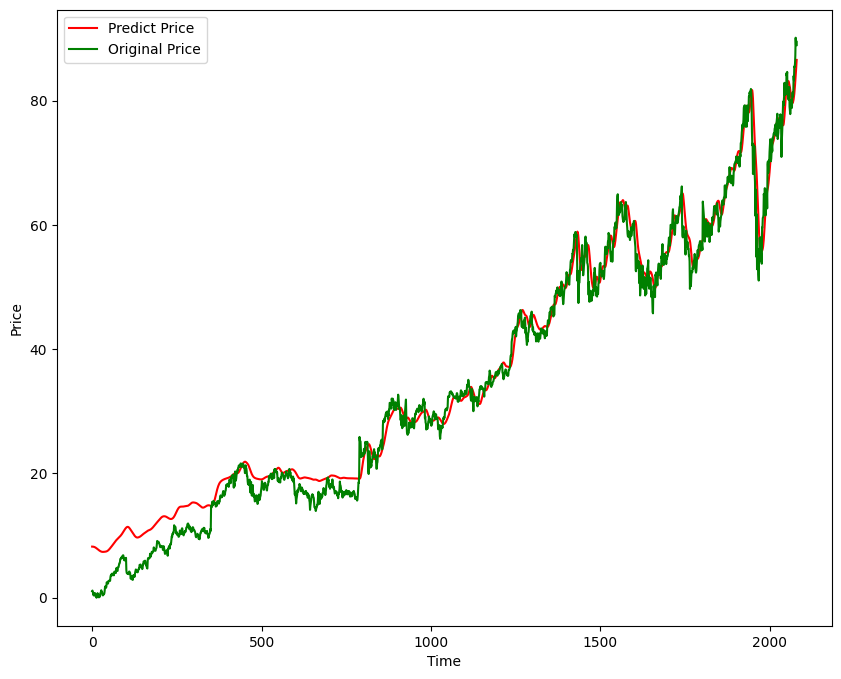

In [66]:
plt.figure(figsize=(10,8))
plt.plot(y_predict , 'r',label= 'Predict Price')
plt.plot(y,'g',label= 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [67]:
model.save('Stock Prediction Model.keras')